# Matching our Flux Estimate to Literature

## Objective

We have made our method of estimating the neutron flux clear in the notes under the section/directory `2-Flux/`. Our aim here is to use this flux--ostensibly that which is present in the ladder lab in SNOLAB--and scale it so that it represents the flux inside the shielded environments of various published results of dark matter searches in the literature. One key to this note is the comparison of our isotropic flux model to the "real" simulated estimates of said results. This will give a cross-check on various assumptions like: a) common flux shape; b) single scatters only; c) surrounding material composition; and d) self-shielding. 

In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

In [2]:
# Setup
import os
import numpy as np
import pandas as pd
import ENDF6el as el
import flux_recoil_spec as frs
from statistics import median
from pyteomics import mass
from time import time

os.chdir('../data_files') #Set working directory to shorten paths
sys.path.append('EDW/')
import EDW

In [3]:
#Import Data
f6TR_nu = pd.read_csv('SNOLAB/Fig6TR_neutrons.txt',encoding='utf-16',comment="#",header=None)
f7TR_nu = pd.read_csv('SNOLAB/Fig7TR_neutrons.txt',comment="#",header=None)

#calculate from our flux
#Flux specific to SNOLAB Si Detectors
Er = np.geomspace(100/1e6,1,100) #recoil energy
E,F,ff,ffspec = frs.SNOLAB_flux(Enmin=1e-3)

drde_Si,_ = frs.dRdErCompoundSave(Er,E,F,N=1,Comp='Si')

fast flux: 4000.0000000000005 n/m^2/day
175
shape of etot: (6000,)
6000 6000
LinregressResult(slope=np.float64(-0.3419890601701721), intercept=np.float64(-12.883178144228607), rvalue=np.float64(-0.9953352356165477), pvalue=np.float64(2.8473572672910784e-06), stderr=np.float64(0.014824519476612421), intercept_stderr=np.float64(0.06273875262265481))
0.009998654133395216 0.01
closing file
Compound Isotope Breakdown Sum (should be 1.0):0.9999999999999999
{'Si[28]': {'a': 0.92223, 'Z': 14, 'A': '28', 'Symbol': 'Si'}, 'Si[29]': {'a': 0.04685, 'Z': 14, 'A': '29', 'Symbol': 'Si'}, 'Si[30]': {'a': 0.03092, 'Z': 14, 'A': '30', 'Symbol': 'Si'}}
4.663709402042852e-26
28 14 Si
/Users/villaa/Research/n-elec-scattering/data_files/xn_data/si28_el.txt /Users/villaa/Research/n-elec-scattering/data_files/xn_data/n-014_Si_028.endf
29 14 Si
/Users/villaa/Research/n-elec-scattering/data_files/xn_data/si29_el.txt /Users/villaa/Research/n-elec-scattering/data_files/xn_data/n-014_Si_029.endf
30 14 Si
/Users/vi

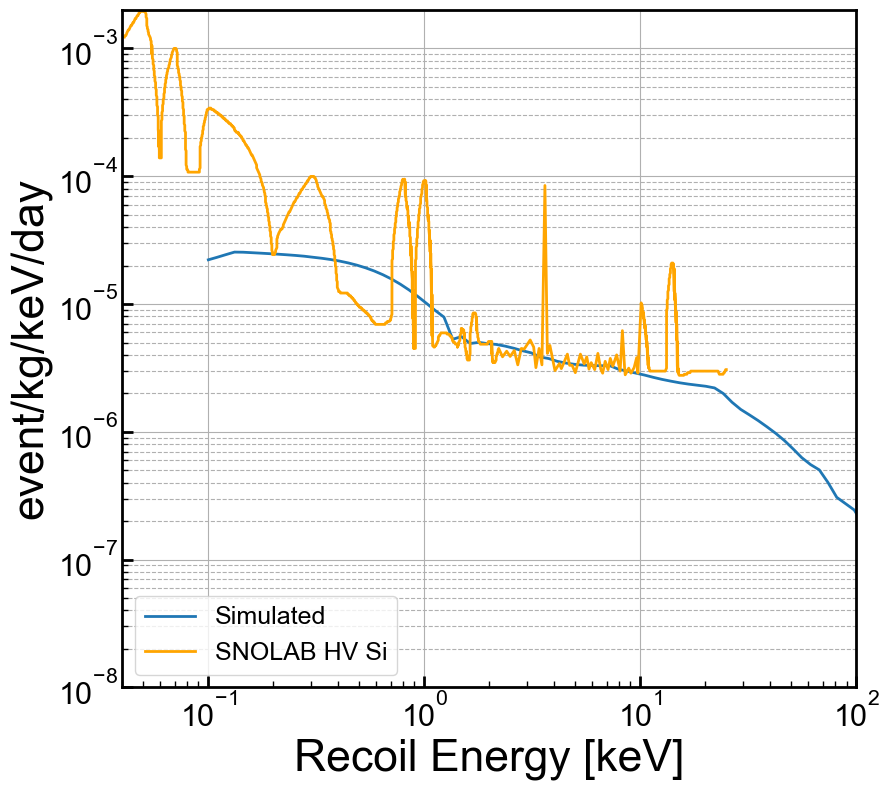

In [4]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

#plt.plot(f6TR_nu[0],f6TR_nu[1]/365,label='SNOLAB HV Si',linestyle='--')
#plt.scatter(f7TR_nu[0],f7TR_nu[1]/365,label='SNOLAB iZIP Si',color='k',s=0.1)

scdms_si_factor=5e-6

ax1.plot(Er*1000,scdms_si_factor*drde_Si[:,0],label='Simulated')
ax1.plot(f6TR_nu[0], f6TR_nu[1]/365,color='orange',linestyle='-',label="SNOLAB HV Si",linewidth=2)


ymin = 1e-8
ymax = 2e-3

#shade in 1-sigma uncertainty bands
#ax1.fill_between(th232chainEn,th_range[0]*jac*th232chainRn/width,th_range[1]*jac*th232chainRn/width, \
#                 facecolor='y',alpha=0.5,label='')
#ax1.fill_between(uchainEn,u_range[0]*jac*uchainRn/width,u_range[1]*jac*uchainRn/width, \
#                 facecolor='r',alpha=0.3,label='')
#ax1.fill_between(sumEn,jac*sumUp/width,jac*sumDn/width, \
#                 facecolor='k',alpha=0.3,label='1$\sigma$ (x10)')


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(0.04, 100) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'Recoil Energy [keV]')
ax1.set_ylabel('event/kg/keV/day')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':18})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.show()